## M11-L2 Problem 1

In this problem you will implement the elbow method using three different sklearn clustering algorithms: (`KMeans`, `SpectralClustering`, `GaussianMixture`). You will use the algorithms to find the number of natural clusters for two different datasets, one "blob" shaped dataset, and one concetric circle dataset.

In [386]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture

def plot_loss(loss, ax = None, title = None):
    if ax is None:
        ax = plt.gca()
    ax.plot(np.arange(2, len(loss)+2), loss, 'k-o')
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Loss')
    if title:
        ax.set_title(title)
    return ax

def plot_pred(x, labels, ax = None, title = None):
    if ax is None:
        ax = plt.gca()
    n_clust = len(np.unique(labels))
    for i in range(n_clust):
        ax.scatter(x[labels == i,0], x[labels == i,1], alpha = 0.5)
    ax.set_title(title)
    return ax

def compute_loss(x, labels):
    # Initialize loss
    loss = 0
    # Number of clusters
    n_clust = len(np.unique(labels))
    # Loop through the clusters
    for i in range(n_clust):
        # Compute the center of a given label
        center = np.mean(x[labels == i, :], axis = 0)
        # Compute the sum of squared distances between each point and its corresponding cluster center
        loss += np.sum(np.linalg.norm(x[labels == i, :] - center, axis = 1)**2)
    return loss


## Blob dataset

Visualize the "blob" dataset generated below, using a unique color for each cluster of points, where `y` contains the label of each corresponding point in `x`.

In [387]:
## DO NOT MODIFY
x, y = make_blobs(n_samples = 1000, n_features = 2, centers = [[0,0],[2,2],[1,-2],[4,0],[-2,-1],[-1,3]], cluster_std = [0.6,0.4,0.6,1.5,0.3,0.8], random_state = 0)

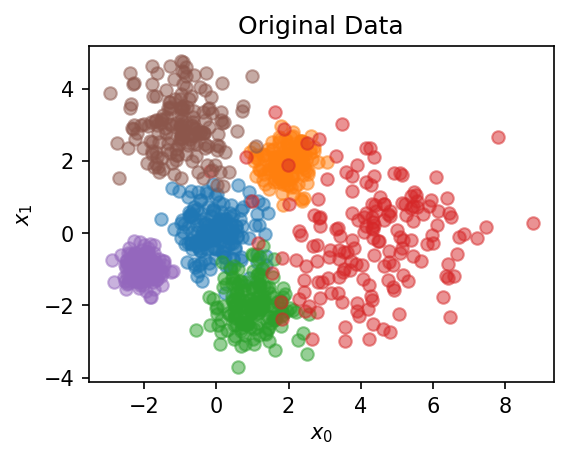

In [388]:
## YOUR CODE GOES HERE
# visualize the data

# plotter fucntion
def plotter(x, labels = None, ax = None, title = None):
    if ax is None:
        _, ax = plt.subplots(dpi = 150, figsize = (4,4))
        flag = True
    else:
        flag = False
    for i in range(len(np.unique(labels))):
        ax.scatter(x[labels == i, 0], x[labels == i, 1], alpha = 0.5)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.set_aspect('equal')
    if title is not None:
        ax.set_title(title)
    if flag:
        plt.show()
    else:
        return ax
    
plotter(x, y, title = 'Original Data')

Use the `sklearn` KMeans, Spectral Clustering, and Gaussian Mixture Model functions to cluster the "blob" data with 6 clusters, and modify the parameters until you get satisfactory results. Plot the results of your three models side-by-side using `plt.subplots` and the provided `plot_pred(x, labels, ax, title)` function.

<Axes: title={'center': 'Gaussian Mixture Model Clustering'}>

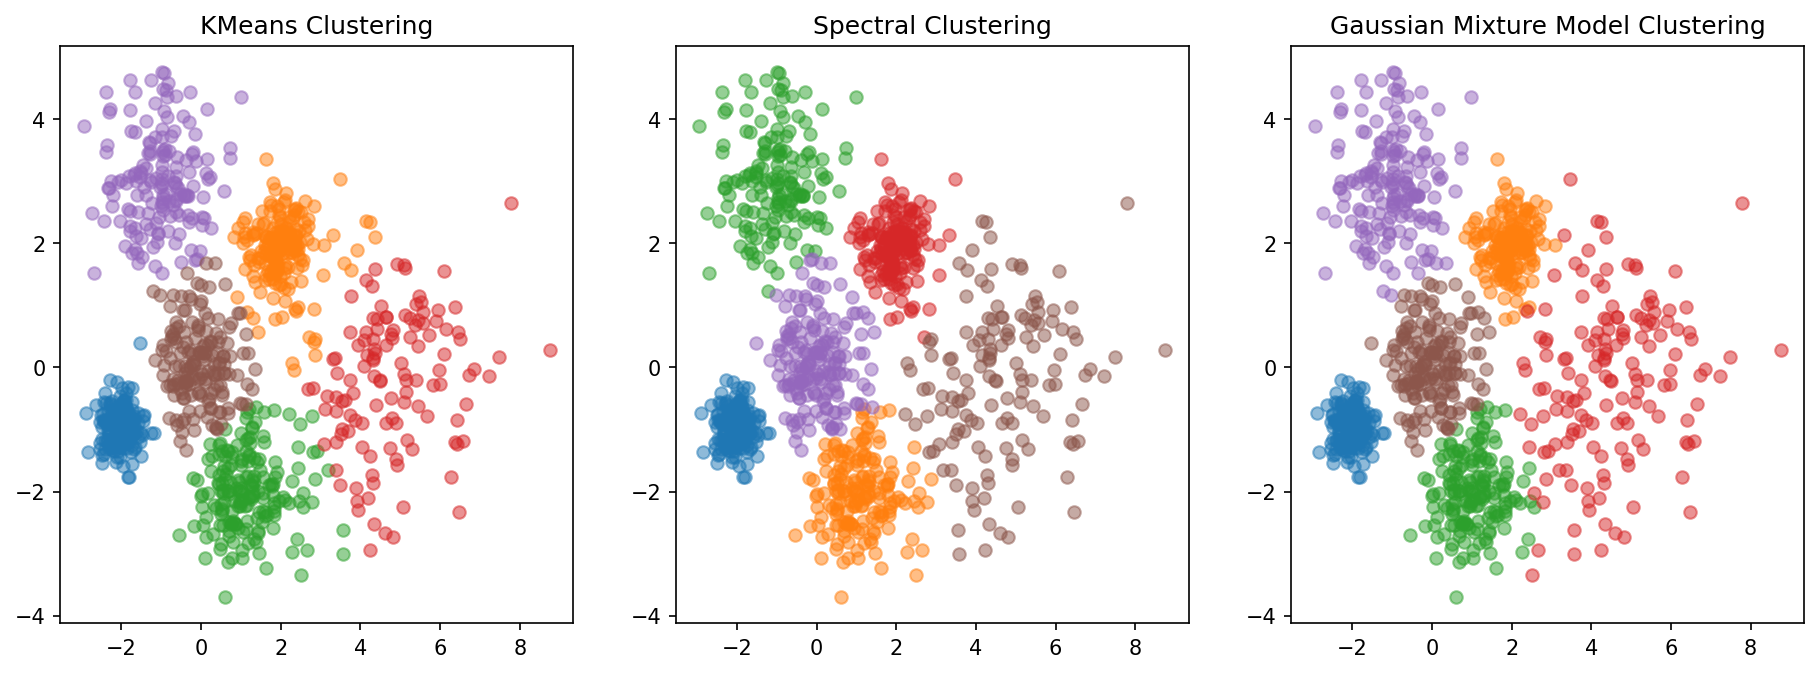

In [389]:
## YOUR CODE GOES HERE
# KMeans, Spectral Clustering, Gaussian Mixture Model
n_clust = 6
kmeans = KMeans(n_clusters = n_clust, random_state = 0).fit(x)
spectral = SpectralClustering(n_clusters = n_clust, random_state = 0, affinity='nearest_neighbors').fit(x)
gmm = GaussianMixture(n_components = n_clust, random_state = 0).fit(x)
 
 # plot the results
fig, ax = plt.subplots(1, 3, figsize = (15,5), dpi = 150)
plot_pred(x, kmeans.labels_, ax = ax[0], title = 'KMeans Clustering')
plot_pred(x, spectral.labels_, ax = ax[1], title = 'Spectral Clustering')
plot_pred(x, gmm.predict(x), ax = ax[2], title = 'Gaussian Mixture Model Clustering')

Using the parameters you found for the three models above, run each of the clustering algorithms for `n_clust = [2,3,4,5,6,7,8,9]` and compute the sum of squared distances loss for each case using the provided `compute_loss(x, labels)` function, where labels is the cluster assigned to each point by the algorithm. Plot loss versus number of cluster for each your three models in side-by-side subplots using the provided `plot_loss(x, labels, ax, title)` function.

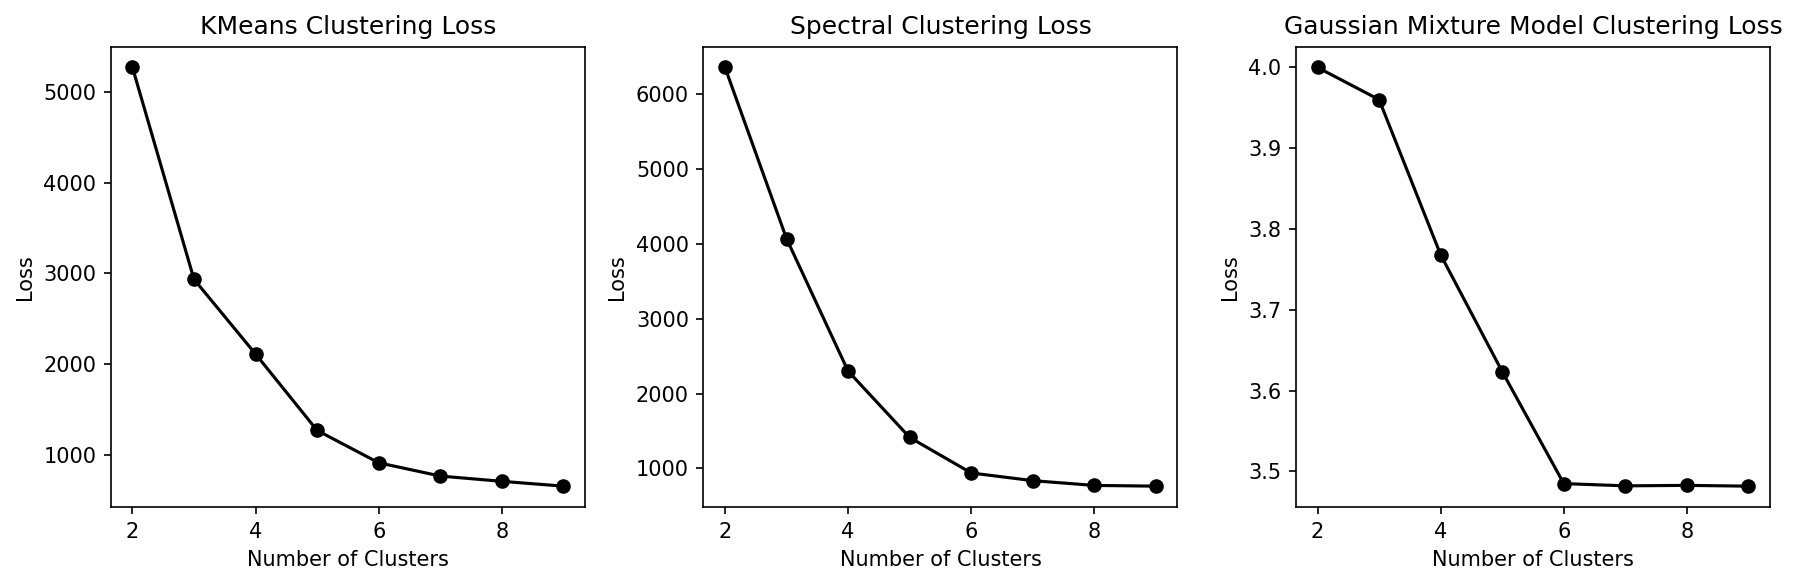

In [390]:
## YOUR CODE GOES HERE
# KMeans, Spectral Clustering, and Gaussian Mixture Model
n_clust = [2, 3, 4, 5, 6, 7, 8, 9]
loss_kmeans = []
loss_spectral = []
loss_gmm = []
for i in n_clust:
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(x)
    loss_kmeans.append(compute_loss(x, kmeans.labels_))
    spectral = SpectralClustering(n_clusters = i, random_state = 0, affinity='nearest_neighbors').fit(x)
    loss_spectral.append(compute_loss(x, spectral.labels_))
    gmm = GaussianMixture(n_components = i, random_state = 0).fit(x)
    loss_gmm.append(-gmm.score(x))

# plot the loss subplot
fig, ax = plt.subplots(1, 3, figsize = (12, 4), dpi = 150)
plot_loss(loss_kmeans, ax = ax[0], title = 'KMeans Clustering Loss')
plot_loss(loss_spectral, ax = ax[1], title = 'Spectral Clustering Loss')
plot_loss(loss_gmm, ax = ax[2], title = 'Gaussian Mixture Model Clustering Loss')
plt.tight_layout()
plt.show()

## Concentric circles dataset
Visualize the "blob" dataset generated below, using a unique color for each cluster of points, where `y` contains the label of each corresponding point in `x`.

In [391]:
## DO NOT MODIFY
x1, y1 = make_circles(n_samples = 400, noise = 0.05, factor = 0.5, random_state = 0)
x2, y2 = make_circles(n_samples = 800, noise = 0.025, factor = 0.75, random_state = 1)

x = np.vstack([x1, x2*2])
y = np.hstack([y1, y2+2])

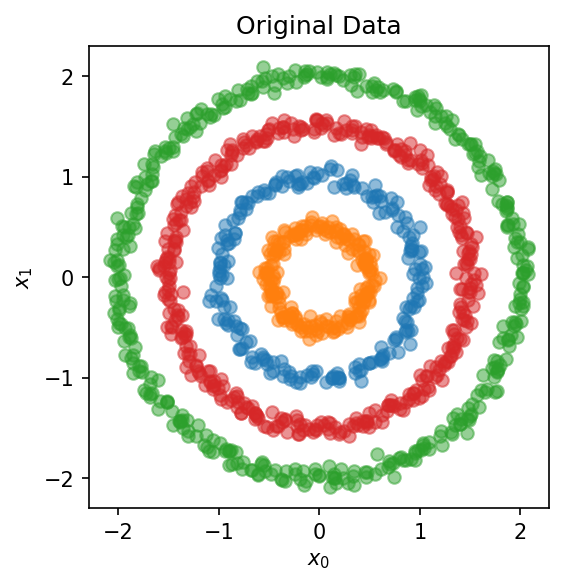

In [392]:
## YOUR CODE GOES HERE
# visualize the data
plotter(x, y, title = 'Original Data')

Use the `sklearn` KMeans, Spectral Clustering, and Gaussian Mixture Model functions to cluster the concentric circle data with 4 clusters, and attempt to modify the parameters until you get satisfactory results. Note: you should get good clustering results with Spectral Clustering, but the KMeans and GMM models will struggle to cluster this dataset well. Plot the results of your three models side-by-side using `plt.subplots` and the provided `plot_pred(x, labels, ax, title)` function.

/Users/ryanwu/Documents/CMU/Spring 24/24-787-AIML/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


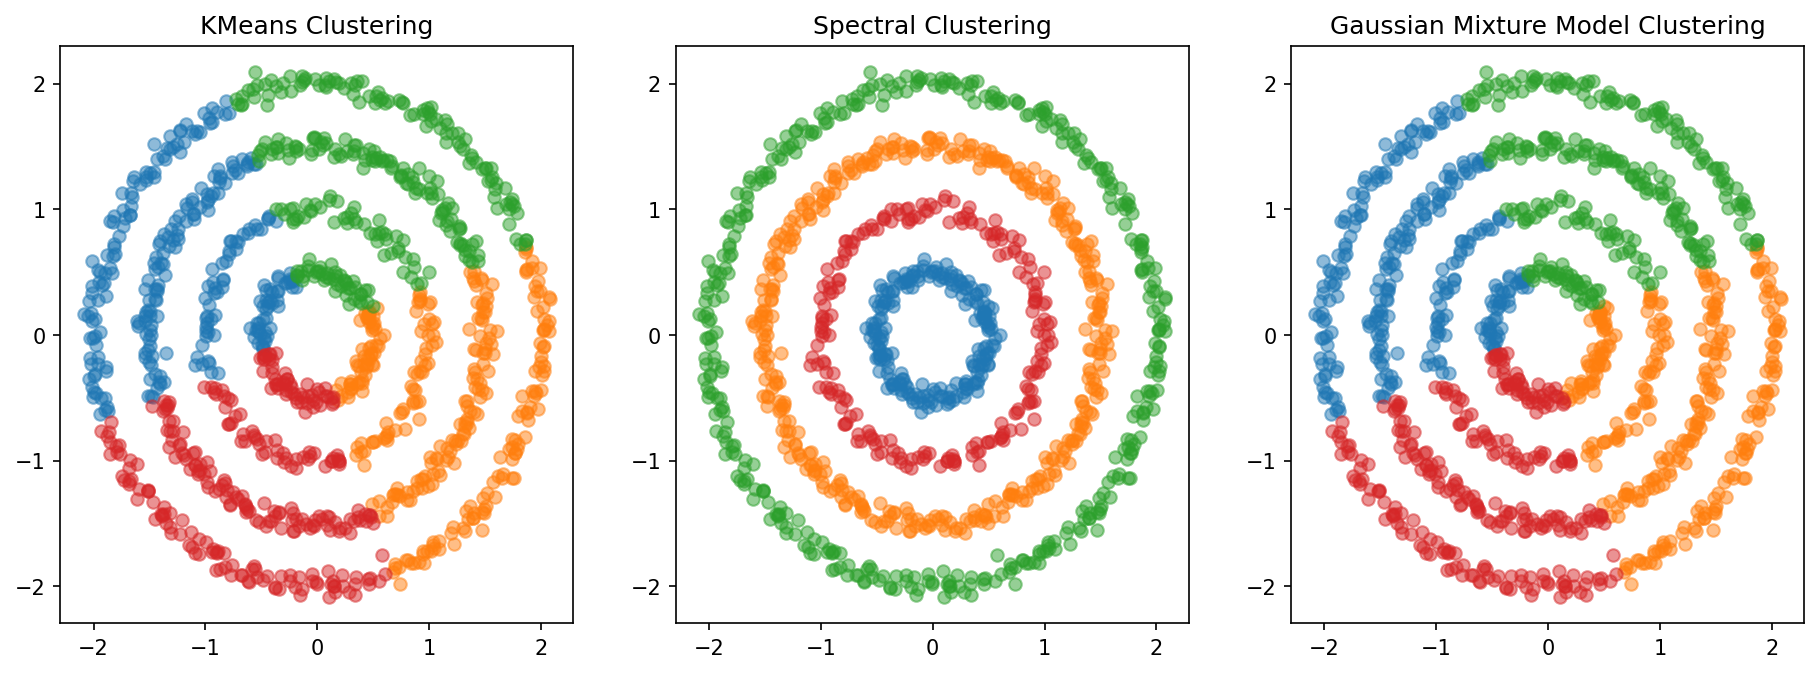

In [393]:
## YOUR CODE GOES HERE
# KMeans, Spectral Clustering, Gaussian Mixture Model
n_clust = 4

kmeans = KMeans(n_clusters = n_clust, random_state = 0).fit(x)
spectral = SpectralClustering(n_clusters = n_clust, random_state = 0, affinity='nearest_neighbors').fit(x)
gmm = GaussianMixture(n_components = n_clust, random_state = 0).fit(x)
 
 # plot the results
fig, ax = plt.subplots(1, 3, figsize = (15,5), dpi = 150)
plot_pred(x, kmeans.labels_, ax = ax[0], title = 'KMeans Clustering')
plot_pred(x, spectral.labels_, ax = ax[1], title = 'Spectral Clustering')
plot_pred(x, gmm.predict(x), ax = ax[2], title = 'Gaussian Mixture Model Clustering')
plt.show()

Using the parameters you found for the three models above, run each of the clustering algorithms for `n_clust = [2,3,4,5,6,7,8,9]` and compute the sum of squared distances loss for each case using the provided `compute_loss(x, labels)` function, where labels is the cluster assigned to each point by the algorithm. Plot loss versus number of cluster for each your three models in side-by-side subplots using the provided `plot_loss(x, labels, ax, title)` function.

/Users/ryanwu/Documents/CMU/Spring 24/24-787-AIML/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/ryanwu/Documents/CMU/Spring 24/24-787-AIML/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/ryanwu/Documents/CMU/Spring 24/24-787-AIML/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/ryanwu/Documents/CMU/Spring 24/24-787-AIML/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/ryanwu/Documents/CMU/Spring 24/24-787-AIML/.venv/lib/pyth

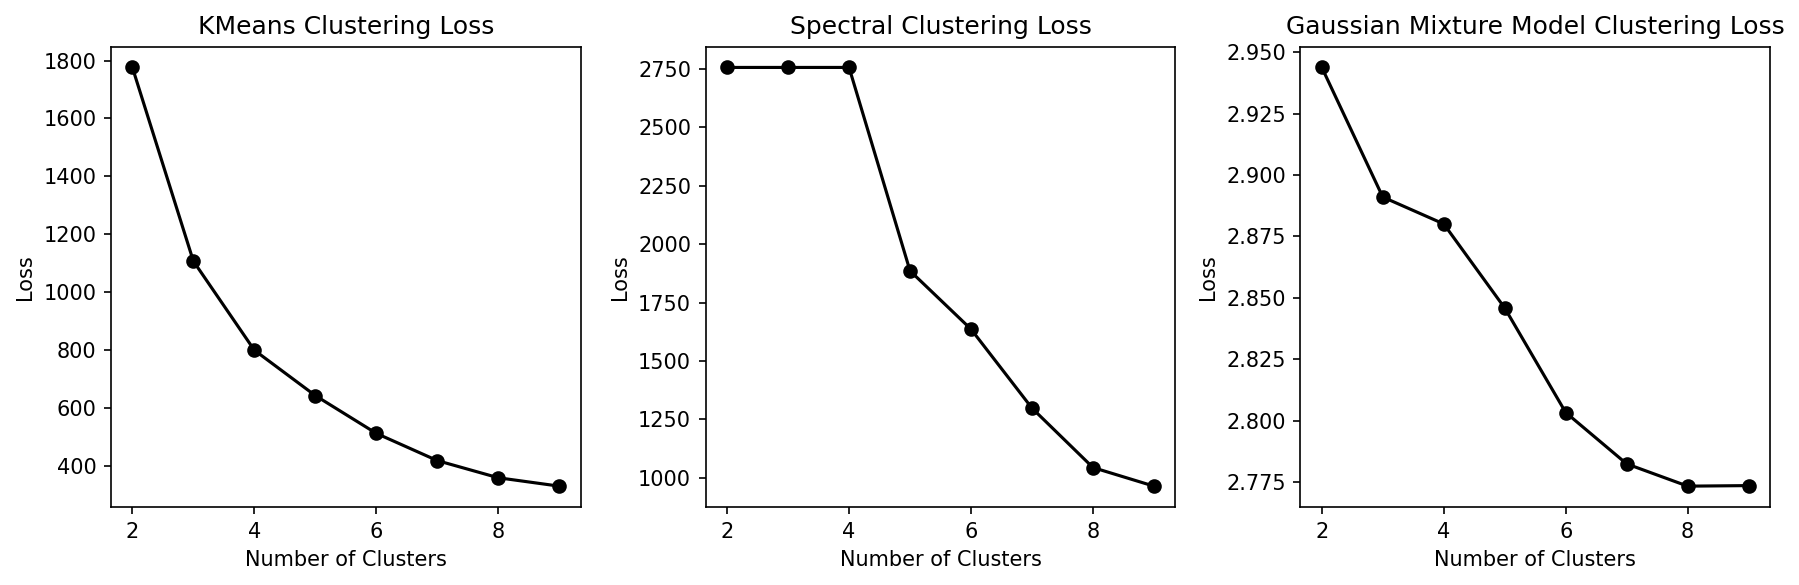

In [394]:
## YOUR CODE GOES HERE
# KMeans, Spectral Clustering, and Gaussian Mixture Model
n_clust = [2, 3, 4, 5, 6, 7, 8, 9]
loss_kmeans = []
loss_spectral = []
loss_gmm = []
for i in n_clust:
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(x)
    loss_kmeans.append(compute_loss(x, kmeans.labels_))
    spectral = SpectralClustering(n_clusters = i, random_state = 0, affinity='nearest_neighbors').fit(x)
    loss_spectral.append(compute_loss(x, spectral.labels_))
    gmm = GaussianMixture(n_components = i, random_state = 0).fit(x)
    loss_gmm.append(-gmm.score(x))

# plot the loss subplot
fig, ax = plt.subplots(1, 3, figsize = (12, 4), dpi = 150)
plot_loss(loss_kmeans, ax = ax[0], title = 'KMeans Clustering Loss')
plot_loss(loss_spectral, ax = ax[1], title = 'Spectral Clustering Loss')
plot_loss(loss_gmm, ax = ax[2], title = 'Gaussian Mixture Model Clustering Loss')
plt.tight_layout()
plt.show()

## Discussion

1. Discuss the performance of the clustering algorithms on the "blob" dataset. Using the elbow method, were you able to identify the number of natural clusters in the dataset for each of the methods? Does the elbow method work better for some algorithms versus others?

For the blob dataset, the KMeans and the Gaussian Mixture Model clustering methods perform the best in classifying clusters. On the other hand, the Spectral clustering method did not perform well in classifying clusters when compared to the ground truth dataset. From the clustering loss, the number of natural clusters is around 6 to 7 for all clustering methods. The elbow method works well for all the algorithms in this use case.

2. Discuss the performance of the clustering algorithms on the concentric circles dataset. Using the elbow method, were you able to identify the number of natural clusters in the dataset for each of the methods?

For the concentric circles dataset, the spectral clustering method performed the best in classifying clusters. On the other hand, the KMeans and the Gaussian Mixture Model clustering methods were unable to correctly classify clusters. From the clustering loss, the number of natural clusters is hard to tell for KMeans and Spectral clustering methods. For the Gaussian Mixture Model, the number of natural clusters is around 8.

3. Does the sum of squared distances work well as a loss function for each of the three clustering algorithms we implemented? Does the sum of squared distance fail on certain types of clusters?

The sum of squared distances works well as a loss function for the KMeans clustering method. However, the sum of squared distances fails for Spectral and Gaussian Mixture clustering methods.